<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/Soluci%C3%B3n%20de%20problema%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema Actividad 10**
Dos personas han quedado citadas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.


## *Solución por simulación*
Usamos la simulación de Monte Carlo, la cual consiste en repetir un experimento muchas veces al azar para aproximar una probabilidad.

En este caso:
*   **Experimento:** dos personas llegan a una cita
*   **Resultado aleatorio:** cada persona llega en un momento entre 0 y 30 minutos (uniformemente al azar).
*   **Éxito:** si la diferencia de tiempo entre sus llegadas es menor o igual a 10 minutos.














In [ ]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt

Vamos a generar N llegadas aleatorias, creando dos listas con tiempos de llegada aleatorios (que sean entre 0 y 30 minutos) para cada persona:

In [ ]:
# Parámetros
N = 1000 # número de simulaciones

# Intervalo de llegada:
lim_inf = 0
lim_sup = 30

x = np.random.uniform(lim_inf, lim_sup, N)
y = np.random.uniform(lim_inf, lim_sup, N)

Para cada par de llegadas $(x_i,y_i)$ vamos a calcular la diferencia absoluta y vamos a contar cuántos éxitos tuvimos en nuestra simulación, es decir, cuántas veces la diferencia fue menor o igual a 10 minutos.

In [ ]:
diferencia = np.abs(x-y)

exitos = np.sum(diferencia <= 10)

Encontramos la probabilidad simulada dividiendo el número de éxitos entre las veces que realizamos la simulación y visualizamos el gráfico donde los puntos azules representan el número de éxitos y los puntos rojos representan el número de fracasos.

La probabilidad obtenida fue: 0.562


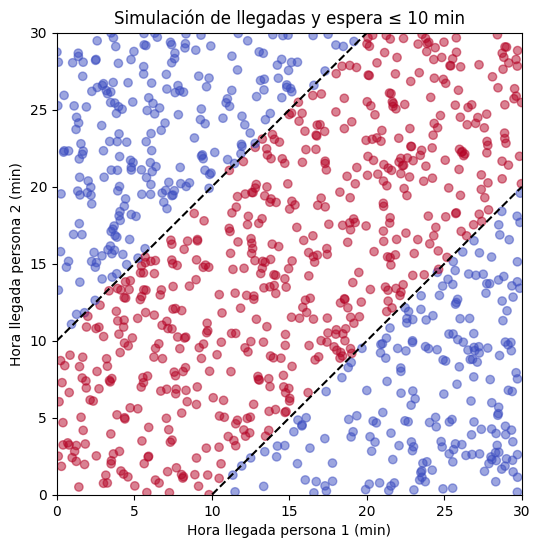

In [ ]:
probabilidad = exitos / N

print(f"La probabilidad obtenida fue: {probabilidad}")

# Visualización de los puntos simulados
plt.figure(figsize=(6,6))
plt.scatter(x[:1000], y[:1000], c=(np.abs(x[:1000] - y[:1000]) <= 10), cmap='coolwarm', alpha=0.5)
plt.plot([0, 30], [10, 40], 'k--', label='y = x + 10')
plt.plot([0, 30], [-10, 20], 'k--', label='y = x - 10')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('Hora llegada persona 1 (min)')
plt.ylabel('Hora llegada persona 2 (min)')
plt.title('Simulación de llegadas y espera ≤ 10 min')
plt.show()